# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [1]:
# Start your codes here!

import re
import sys
import os 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time
import datetime

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
os.chdir(r'C:\Users\dangq\Downloads\Assignment4_DevC')
data = pd.read_csv('google-play-store.csv')

In [3]:
# Print first few rows from data

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Print last few rows from data

data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Shape of data 

data.shape

(10841, 13)

In [6]:
# Basic information of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [7]:
# Checking null values

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Types of data

data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
# Describing our data

data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# Columns present in our data

data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Data Cleaning

*   Removing null values
*   Filling missing values
*   Remove certain characters from the string and convert it into usable format.




In [11]:
# The best way to fill missing values might be using the median instead of mean

data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [12]:
# Lets convert all the versions in the format number.number to simplify the data
# We have to clean all non numerical values & unicode charachters 

replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

data['Current Ver'] = data['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].median())

In [13]:
# Count the number of unique values in category column 

data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
# Check the record  of unreasonable value which is 1.9
i = data[data['Category'] == '1.9'].index
data.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


It's obvious that the first value of this record is missing (App name) and all other values are respectively propagated backward starting from "Category" towards the "Current Ver"; and the last column which is "Android Ver" is left null. It's better to drop the entire recored instead of consider these unreasonable values while cleaning each column!

In [15]:
# Drop this bad column
data = data.drop(i)

In [16]:
# Removing NaN values
data = data[pd.notnull(data['Last Updated'])]
data = data[pd.notnull(data['Content Rating'])]

## Plotting

1.) Count of application according to Category

Text(0.5, 1.0, 'Count of application according to category')

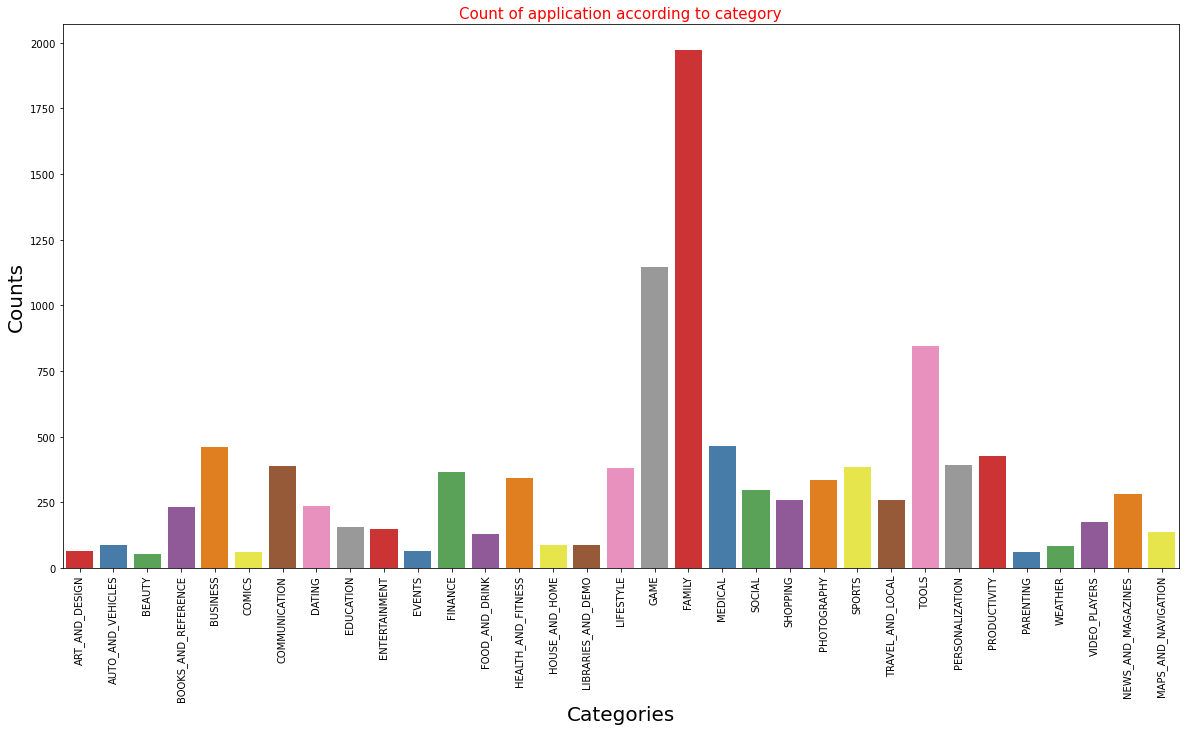

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Category', data=data, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Count of application according to category', fontsize=15, color='r')

Seems like family and games category have quite large number 

2.) Let's look at the Rating distribution

Text(0.5, 1.0, 'Distribution of Rating')

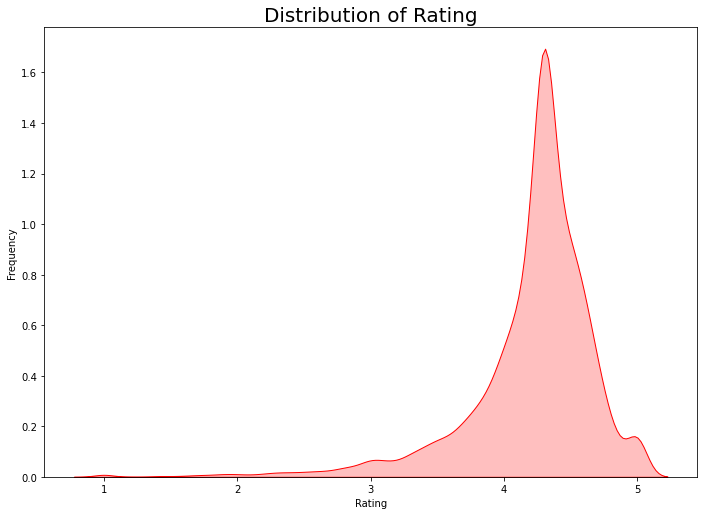

In [18]:
from pylab import rcParams

rcParams['figure.figsize'] = 11.7, 8.27
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

3.) Let's check out the percentage of free apps in data

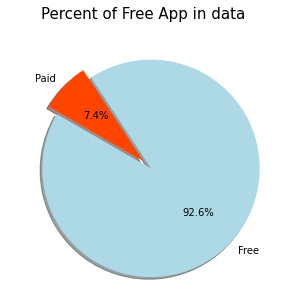

In [19]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["lightblue","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150,)

plt.title('Percent of Free App in data', size = 15)
plt.show()

Majority of the apps are free

4.) Category Distribution

*   Wordcloud represents categories with highest number of active apps 



5.) Content Distribution

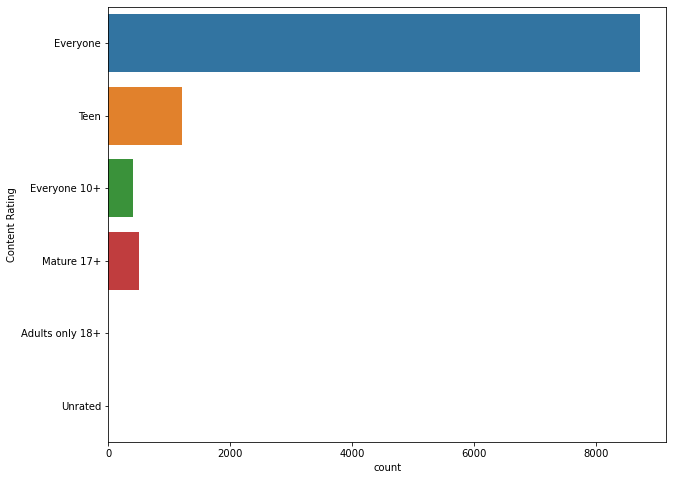

In [20]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y='Content Rating', data=data)

# Categorical Data Encoding

We need to convert categorical features (strings) to numerical features (numbers). 

Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. We need to make all data ready for the model, so we will convert categorical variables (variables that stored as text values) into numerical variables. 

In [21]:
# App values encoding

LE = preprocessing.LabelEncoder()
data['App'] = LE.fit_transform(data['App'])

In [22]:
# Category features encoding

CategoryList = data['Category'].unique().tolist() 

LE = preprocessing.LabelEncoder()
data['Category'] = LE.fit_transform(data['Category'])

In [23]:
# Genres features encoding

LE = preprocessing.LabelEncoder()
data['Genres'] = LE.fit_transform(data['Genres'])

In [24]:
# Content Rating features encoding

LE = preprocessing.LabelEncoder()
data['Content Rating'] = LE.fit_transform(data['Content Rating'])

In [25]:
# Type encoding

data['Type'] = pd.get_dummies(data['Type'])

In [26]:
# Last Updated encoding

data['Last Updated'] = data['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))


In [27]:
# Price cleaning

data['Price'] = data['Price'].apply(lambda x : x.strip('$'))

In [28]:
# Installs cleaning

data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [29]:
# Convert kbytes to Mbytes

k_indices = data['Size'].loc[data['Size'].str.contains('k')].index.tolist()

converter = pd.DataFrame(data.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))

data.loc[k_indices,'Size'] = converter

In [30]:
# Size cleaning

data['Size'] = data['Size'].apply(lambda x: x.strip('M'))
data[data['Size'] == 'Varies with device'] = 0
data['Size'] = data['Size'].astype(float)

In [31]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6962,0,4.1,159,19.0,10000,1,0,1,9,1.515258e+09,1.00,4.0.3 and up
1,2632,0,3.9,967,14.0,500000,1,0,1,12,1.515949e+09,2.00,4.0.3 and up
2,8656,0,4.7,87510,8.7,5000000,1,0,1,9,1.533056e+09,1.24,4.0.3 and up
3,7827,0,4.5,215644,25.0,50000000,1,0,4,9,1.528391e+09,0.00,4.2 and up
4,7022,0,4.3,967,2.8,100000,1,0,1,11,1.529428e+09,1.10,4.4 and up


# Building Machine Learning Model

In [32]:
features = ['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']

X = data[features]
y = data['Rating']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

#### Decision Tree Regression

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [34]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_train, y_train)
accuracy

0.9159921903133352